# Introduction to Topic Modelling For Business

---



#### The following code and tutorial was taken from the Coursera course from Barsha Saha. I have simply edited it to include notes and further insights I've gained. I also hope to employ my own personal use case in the future.
---


#### Topic model is a statistical model to find latent "topics" or themes from a collection of documents (corpus).
#### It is a frequently used text-mining tool to extract hidden semantic structures in a corpus.
#### These structures could be considered as cluster words for a set of documents. This method is a type of 'unsupervised' machine learning as it does not require any predefined list of tags or training data for analysis.

#### Advantages:
    -The document-generative process can be adapted to other kinds of analyses, keeping only the analogy between document-topic-word and other kinds of objects. Therefore, the basis of topic modeling is the appointment of three objects: documents, words, and topics.
    -Manually doing the same is cumbersome and inefficient

#### Usage:

    Businesses can use Topic Modelling methods to decipher themes from annual reports, news covers, social media posts, related articles, latest trends in the domain, etc.

For the Coursera project we will use the articles related to:

### Digital Economy

The dataset hosts 2488 articles in this topic. The summary of each topic will be used as the base for the topic models.
   
This project is divided in 6 tasks:

####Task 1: Introduction to the dataset
####Task 2: Data cleaning and preparation
####Task 3: Exploratory analysis with WordCloud
####Task 4: Prepare data for Topic Modelling
####Task 5: Build Topic Model
####Task 6: Visualize Model

##### For the task below, we are utilizing Gensim. Further information about Gensim can be found at the following links [here](https://radimrehurek.com/gensim/models/ldamulticore.html) and [here](https://radimrehurek.com/gensim/models/ldamodel.html). These tools can be utilized in Python to conduct NLP and are optimized for efficiency (e.g. parallelism with CPU Cores). 

###Task 1: Introduction to the dataset

Importing Modules

In [15]:
# Importing modules
import pandas as pd
import os
os.chdir('..')

import numpy as np
import re, nltk, spacy, gensim

import logging
import warnings
warnings.filterwarnings('ignore')  

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [43]:
# Upload .csv file
from google.colab import files 
uploaded = files.upload()

Saving DigitalEconomyDatasetTM.csv to DigitalEconomyDatasetTM.csv


In [45]:
# Store dataset in a Pandas Dataframe
import io 
df = pd.read_csv(io.BytesIO(uploaded['DigitalEconomyDatasetTM.csv']))

Read dataset

In [46]:
df.head()

,Authors,Title,Year,Abstract,Keywords
0,"Nguyen Q.K., Dang Q.V.",Blockchain Technology - Opportunities for Emer...,2018,The recent major scientific conferences on the...,blockchain; digitaltechnology; distributed dia...
1,"Melnyk M., Korcelli-Olejniczak E., Chorna N., ...",Development of regional IT clusters in Ukraine...,2018,Introduction. Accelerated introduction of mode...,Country’s Innovation Ecosystem; Development of...
2,"Reisman R., Bertini M.",A novel architecture to monetize digital offer...,2018,As commerce continues to shift to the digital ...,Digital goods; Electronic commerce; Price disc...
3,"Bertola P., Teunissen J.",Fashion 4.0. Innovating fashion industry throu...,2018,Purpose: The on-going transition of societies ...,Design driven companies; Digital transformatio...
4,Moreno de la Santa J.G.-S.,The travel industry in 2018 – setting the scen...,2018,Purpose: The purpose of the paper is to identi...,China; Digital transformation; Global economy;...


In [48]:
print(df.shape)
## These results (2488, 5) should make sense because we have 2488 articles that have been analyzed and 5 columns for each article. 

(2488, 5)


### Task 2: Data cleaning and preparation

**The Model** will be built on the column 'Abstract'.
Other columns could be used for exploratory analysis, but for this case, we only need abstract. 

In [50]:
df['Abstract'].head()
## Something to note is that .head() defaults to n = 5 and basically yields the first 5 rows depending on its input. 
## In this case, we specify we want the abstracts of the first five rows! 

0    The recent major scientific conferences on the...
1    Introduction. Accelerated introduction of mode...
2    As commerce continues to shift to the digital ...
3    Purpose: The on-going transition of societies ...
4    Purpose: The purpose of the paper is to identi...
Name: Abstract, dtype: object

In [51]:
## Scrubbing no abstract available from dataset
## df.drop removes stuff. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html. DF stands for dataframe. 
df.drop(df[df['Abstract'] == '[No abstract available]'].index,inplace =True)

In [53]:
print(df.shape)
# Note the drop in number of rows. This is because we've removed the no abstract available sections! 

(2423, 5)


In [54]:
## This is the regular expression library! 
## https://docs.python.org/3/library/re.html

## Here, this library is utilized to clean up data via removing punctuation and lowercasing all the data. 
import re

# Remove punctuation, p_abstract means processed abstracts. 
df['p_abstract'] = df['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['p_abstract'] = df['p_abstract'].map(lambda x: x.lower())

# Print out the first rows of papers
df['p_abstract'].head()

0    the recent major scientific conferences on the...
1    introduction accelerated introduction of moder...
2    as commerce continues to shift to the digital ...
3    purpose: the on-going transition of societies ...
4    purpose: the purpose of the paper is to identi...
Name: p_abstract, dtype: object

### Task 3: Exploratory Analysis with WordCloud

Build wordclouds for Title and Abstract fields.

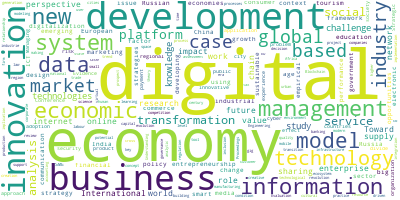

In [57]:
#For Title

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different titles together.
# This quite literally joins all the different titles together into a giant string with a comma to seperate them. 

long_string = ','.join(list(df['Title'].values))

# Generate the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=500, 
                      contour_width = 3, 
                      contour_color = 'steelblue', 
                      collocations = False).generate(long_string)


# Generate the word cloud but with only 200 words now! 
# wordcloud2 = WordCloud(background_color="white", 
#                       max_words=200, 
#                       contour_width = 3, 
#                       contour_color = 'steelblue', 
#                       collocations = False).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()


Now, we should remove the commonly used words (or irrelevant according to the context) from the wordcloud. 

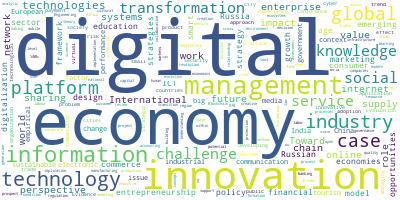

In [58]:
## Remove STOPWORDS taking reference from previous wordcloud
## In computing, stop words are words which are filtered out before or after processing of natural language data. 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["research", "economic", "study", "data", "development", "result", "analysis", "model", 
                 "based", "using", "new", "market", "business", "system", "use"])

# Generate the word cloud
wordcloud3 = WordCloud(stopwords=stopwords, 
                       background_color="white", 
                      max_words=200, 
                      contour_width = 3, 
                      contour_color = 'steelblue', 
                      collocations = False).generate(long_string)


# Visualize the word cloud
wordcloud3.to_image()

###Task 4: Prepare data for Topic Modelling

Step 1: Split sentences to words

In [62]:
%%time
import gensim
from gensim.utils import simple_preprocess

# Simple pre-processs converts a document into a list of tokens.
# This lowercases, tokenizes, de-accents (optional). – the output are final tokens = unicode strings, that won’t be processed any further.
# Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. 
# Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

def sent_to_words (sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = df.p_abstract.values.tolist() # tolist() function return a list of the values. So this is just a list of the abstracts. 
data_words = list(sent_to_words(data)) 
print(data_words[:1]) # an example of the output is printed. 


[['the', 'recent', 'major', 'scientific', 'conferences', 'on', 'the', 'innovatube', 'frontier', 'ifs', 'have', 'focused', 'on', 'four', 'areas', 'of', 'pioneering', 'technologies', 'including', 'artificial', 'intelligence', 'internet', 'of', 'things', 'blockchain', 'and', 'augmented', 'reality', 'virtual', 'reality', 'blockchain', 'has', 'gained', 'lot', 'of', 'attention', 'because', 'not', 'only', 'it', 'is', 'the', 'technology', 'that', 'has', 'created', 'the', 'fever', 'of', 'the', 'bitcoin', 'and', 'ethereum', 'digital', 'coins', 'but', 'also', 'because', 'of', 'its', 'great', 'potentials', 'that', 'can', 'change', 'the', 'nature', 'of', 'the', 'real', 'world', 'and', 'in', 'everyone', 'lives', 'there', 'have', 'been', 'various', 'studies', 'on', 'blockchain', 'however', 'in', 'reality', 'the', 'percentage', 'of', 'people', 'who', 'understand', 'blockchain', 'remain', 'minute', 'this', 'paper', 'will', 'highlight', 'the', 'important', 'role', 'of', 'blockchain', 'technology', 'in',

Step 2: Build N-grams


> Bigrams: Bigram is 2 consecutive words in a sentence. E.g. “The boy is playing football”. The bigrams here are: The boy Boy is Is playing Playing football. 

> Trigrams: Trigram is 3 consecutive words in a sentence. For the above example trigrams will be: The boy is Boy is playing Is playing football.





---



In [67]:
#N Grams is a sequence of n-words that are commonly occuring together. 

# Build the bigram and trigram models
# Automatically detect common phrases – aka multi-word expressions, word n-gram collocations – from a stream of sentences.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)          # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words],threshold=100)
# Faster way to get a sentence formatted as a bigram or trigram
bigram_mod = gensim.models.phrases.Phraser (bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



Step 3: Remove Stopwords

In [68]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # commonly occuring stopwords in English 

# We add our own stopwords here! 
stop_words.extend(['research', 'study', 'data', 'development', 'result', 'analysis', 'model', 
                 'based', 'using', 'new', 'market', 'business', 'system', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Lemmatisation in linguistics is the process of grouping together the inflected forms of a word
# so they can be analysed as a single item, identified by the word's lemma, or dictionary form. 

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts: 
      doc = nlp(" ".join(sent)) # This is what's called a doc object. 
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags]) # This basically filters the document for lemma if it's noun, adj, verb, or adv. 
    return texts_out
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 4: Lemmatize

In [69]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words) 
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
# Lemmatize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['recent', 'major', 'scientific', 'conference', 'focus', 'area', 'pioneer', 'technology', 'include', 'artificial_intelligence', 'internet', 'thing', 'blockchain', 'augmented_reality', 'virtual', 'reality', 'blockchain', 'gain', 'lot', 'attention', 'technology', 'create', 'fever', 'bitcoin', 'ethereum', 'coin', 'also', 'great', 'potential', 'change', 'nature', 'real', 'world', 'live', 'various', 'study', 'blockchain', 'however', 'reality', 'percentage', 'people', 'understand', 'remain', 'minute', 'paper', 'highlight', 'important', 'role', 'blockchain', 'technology', 'future', 'world', 'especially', 'develop', 'country']]


Step 5: Build Corpora

In [70]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized) # Dictionary encapsulates the mapping between normalized words and their integer ids.
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
# Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. 
# Each word is assumed to be a tokenized and normalized string (either unicode or utf8-encoded). 
# No further preprocessing is done on the words in document; apply tokenization, stemming etc. before calling this method.
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

# But what does this output mean?
# The first area of the tuple refers to the word's ID, which is the unique one-hot encoding of that word. 
# The second area of the tuple refers to the number of times that word shows up in the text. 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2)]]


###Task 5: Build topic model

In [71]:
# Build LDA model

# In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained
# by unobserved groups that explain why some parts of the data are similar.
# https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=id2word,
                                            num_topics = 10, 
                                            random_state = 123, 
                                            chunksize=100, 
                                            passes = 10, 
                                            alpha = 0.01, 
                                            eta = 'auto', 
                                            iterations = 400, 
                                            per_word_topics = True
                                            )

In [72]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"economy" + 0.015*"work" + 0.013*"economic" + 0.010*"social" + '
  '0.010*"change" + 0.009*"share" + 0.008*"global" + 0.007*"people" + '
  '0.007*"digital" + 0.007*"cyber"'),
 (1,
  '0.014*"big" + 0.014*"millennial" + 0.013*"analytic" + 0.012*"leader" + '
  '0.011*"leadership" + 0.011*"transport" + 0.010*"health" + 0.008*"person" + '
  '0.007*"can" + 0.007*"system"'),
 (2,
  '0.035*"online" + 0.031*"consumer" + 0.017*"addition" + 0.015*"pay" + '
  '0.012*"previous" + 0.012*"consist" + 0.012*"user" + 0.010*"product" + '
  '0.010*"circular" + 0.009*"web"'),
 (3,
  '0.019*"digital" + 0.014*"economy" + 0.012*"paper" + 0.010*"platform" + '
  '0.009*"service" + 0.009*"provide" + 0.008*"approach" + 0.008*"process" + '
  '0.007*"technology" + 0.007*"develop"'),
 (4,
  '0.036*"marketing" + 0.027*"information" + 0.022*"public" + 0.022*"medium" + '
  '0.021*"government" + 0.020*"citizen" + 0.018*"chinese" + 0.014*"generation" '
  '+ 0.014*"construction" + 0.013*"digitization"'),
 (5

In [73]:
from gensim.models import CoherenceModel

# Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. 
# These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. 

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus) )  # A measure of how good the model is. Lower value is preferred.

# Compute Coherence Score
# This relates to the score based on a sliding window, one-set segmentation of the top words and indirect confirmation measure that uses NPMI and cosine similarity. 
coherence_model_lda = CoherenceModel  (model=lda_model, texts=data_lemmatized, dictionary = id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda )

# Compute Coherence Score using UMass
# This is is based on document cooccurenace, a one-preceding segmentation, and a logrithmic conditional probabilty. 
coherence_model_lda = CoherenceModel (model= lda_model, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence() 
print('\nCoherence Score u_mass: ', coherence_lda )


Perplexity:  -7.8572895288696225

Coherence Score:  0.33813053427894463

Coherence Score u_mass:  -4.071330317407208


###Task 6: Visualize model

In [74]:
# Visualize the topics
# Python library for interactive topic model visualization. pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data.
!pip install -U pyLDAvis
import pyLDAvis.gensim


     |████████████████████████████████| 1.6MB 4.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=06203e53996de0490cf1ab10238bad1ca74dc241b0b39b1cd3ef6ac1bcd3902a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


The distance between text is an indicator of how semantically different the topics are; the farther apart, the better and unique the topics are. 

In [75]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,corpus,id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.127655  0.002241       1        1  31.408183
0     -0.017133 -0.125550       2        1  15.074730
8     -0.164118  0.066486       3        1  13.777680
7     -0.065475 -0.117434       4        1  10.790955
5     -0.148319  0.077220       5        1  10.399568
6      0.066945 -0.237341       6        1   4.325312
4     -0.048659  0.115861       7        1   4.258117
2      0.187132 -0.031299       8        1   3.807182
1      0.256961  0.127773       9        1   3.369768
9      0.060322  0.122042      10        1   2.788505, topic_info=             Term         Freq        Total Category  logprob  loglift
390        online   695.000000   695.000000  Default  30.0000  30.0000
119   information  1330.000000  1330.000000  Default  29.0000  29.0000
136    management  1043.000000  1043.000000  Default  28.0000  28.0000
309      industry  1045.000000  1045.000000  Default  27.0000  27.0000
90       economic  1571.000000  1571.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
818      creative    30.314501    93.970144  Topic10  -5.3557   2.4483
2536          act    30.245897   111.182441  Topic10  -5.3580   2.2779
96    environment    32.717752   478.614045  Topic10  -5.2794   0.8967
612   possibility    30.342904   171.693502  Topic10  -5.3548   1.8465
91        economy    32.641296  3350.587486  Topic10  -5.2818  -1.0516

[589 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1869      1  0.994864          able
4094      7  0.972866        abroad
243       1  0.996344      academic
2371     10  0.992087  acceleration
635       1  0.104706        access
...     ...       ...           ...
1178      7  0.003328         would
1178      8  0.063236         would
1178      9  0.009985         would
1178     10  0.003328         would
1777      7  0.971875         yield

[1483 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 9, 8, 6, 7, 5, 3, 2, 10])

References

Liu, L., Tang, L., Dong, W., Yao, S., & Zhou, W. (2016). An overview of topic modeling and its current applications in bioinformatics. SpringerPlus, 5(1), 1608. https://doi.org/10.1186/s40064-016-3252-8)

Coursera. “Introduction to Topic Modeling for Business - Home.” Accessed October 14, 2020. https://www.coursera.org/learn/introduction-to-topic-modeling-for-business/home/welcome.